<a href="https://colab.research.google.com/github/f8sle/report/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC20250613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말고사(20250613)**
학번 : 2020140008             
성명 : 박성훈

# **문제 1) ANN Backpropagation**

In [12]:
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3

In [10]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# MSE and MAPE functions
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

# Data Generation
np.random.seed(0)
num_samples = 300
x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)
X = np.vstack((x1, x2, x3)).T
y = (3 * x1 - 2 * x2 + x3).reshape(-1, 1)

# ANN Architecture
input_size = 3
hidden_size = 10
output_size = 1

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Hyperparameters
learning_rate = 0.001
epochs = 100

# Training
mse_history = []
mape_history = []

for epoch in range(epochs):
    # Forward propagation
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = z2  # Linear activation for output (since it's a regression problem)

    # Compute loss
    mse_loss = mse(y, a2)
    mape_loss = mape(y, a2)
    mse_history.append(mse_loss)
    mape_history.append(mape_loss)

    # Backward propagation
    error_output = a2 - y
    delta_output = error_output  # Derivative of linear activation is 1

    error_hidden = np.dot(delta_output, W2.T)
    delta_hidden = error_hidden * sigmoid_derivative(a1)

    # Update weights and biases
    W2 -= learning_rate * np.dot(a1.T, delta_output)
    b2 -= learning_rate * np.sum(delta_output, axis=0, keepdims=True)
    W1 -= learning_rate * np.dot(X.T, delta_hidden)
    b1 -= learning_rate * np.sum(delta_hidden, axis=0, keepdims=True)

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, MSE: {mse_loss:.4f}, MAPE: {mape_loss:.4f}%")

# Final evaluation
print("\nFinal Results:")
print(f"Final MSE: {mse_history[-1]:.4f}")
print(f"Final MAPE: {mape_history[-1]:.4f}%")


Epoch 10/100, MSE: 1.1920, MAPE: 304.5244%
Epoch 20/100, MSE: 1.1836, MAPE: 304.4806%
Epoch 30/100, MSE: 1.1745, MAPE: 304.3345%
Epoch 40/100, MSE: 1.1641, MAPE: 304.0253%
Epoch 50/100, MSE: 1.1517, MAPE: 303.4814%
Epoch 60/100, MSE: 1.1367, MAPE: 302.6201%
Epoch 70/100, MSE: 1.1183, MAPE: 301.3343%
Epoch 80/100, MSE: 1.0956, MAPE: 299.4881%
Epoch 90/100, MSE: 1.0677, MAPE: 296.9188%
Epoch 100/100, MSE: 1.0336, MAPE: 293.4314%

Final Results:
Final MSE: 1.0336
Final MAPE: 293.4314%


# **문제 2) CNN**
- Data
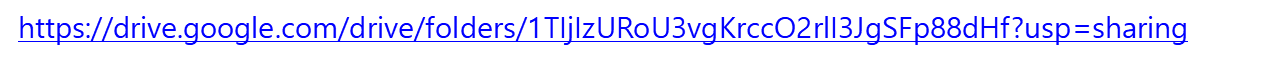

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/sample/Finger_test_label.npy')

# **문제 3) K-means clustering**

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

In [20]:
data_1 = data1.T
data_2 = data2.T
data_3 = data3.T
data_4 = data4.T

data = np.concatenate((data_1, data_2, data_3, data_4), axis=0)

# K-means clustering function
def kmeans(X, k, centroids_init, max_iters=100):
    # Validate centroids_init shape
    if centroids_init.shape != (k, X.shape[1]):
        raise ValueError(f"centroids_init shape {centroids_init.shape} does not match expected (k={k}, features={X.shape[1]})")

    centroids = centroids_init.copy()  # Avoid modifying input
    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.sum(labels == i) > 0 else centroids[i]
                                 for i in range(k)])

        # Check convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    # Calculate inertia (within-cluster sum of squares)
    inertia = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(k)])
    return labels, centroids, inertia

# Initialize centroids as means of the four data sets
centroids_init = np.array([data1.mean(axis=0), data2.mean(axis=0),
                          data3.mean(axis=0), data4.mean(axis=0)])
# Verify initial centroids shape
if centroids_init.shape != (4, 2):
    raise ValueError(f"Initial centroids shape {centroids_init.shape} does not match expected (4, 2)")

# Elbow method to find optimal K
inertias = []
K_range = range(1, 11)
for k in K_range:
    if k <= 4:
        # Use provided initial centroids for k <= 4
        init_centroids = centroids_init[:k]
    else:
        # Random initialization for k > 4
        init_centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    # Verify shape before passing to kmeans
    if init_centroids.shape != (k, 2):
        raise ValueError(f"init_centroids shape {init_centroids.shape} does not match expected (k={k}, 2)")

    labels, centroids, inertia = kmeans(data, k, init_centroids)
    inertias.append(inertia)

# Find Elbow point (using second derivative approximation)
diff = np.diff(inertias)
diff2 = np.diff(diff)
elbow_point = K_range[1:-1][np.argmax(diff2)] if len(diff2) > 0 else 4

# Run K-means with optimal K
init_centroids = centroids_init[:elbow_point] if elbow_point <= 4 else data[np.random.choice(data.shape[0], elbow_point, replace=False)]
optimal_labels, optimal_centroids, _ = kmeans(data, elbow_point, init_centroids)

# Print results
print(f"Optimal number of clusters (Elbow point): {elbow_point}")
print(f"Final centroids:\n{optimal_centroids}")

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Elbow point (K={elbow_point})')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.grid(True)
plt.show()

# Plot clustered data
plt.figure(figsize=(8, 5))
plt.scatter(data[:, 0], data[:, 1], c=optimal_labels, cmap='viridis', alpha=0.5)
plt.scatter(optimal_centroids[:, 0], optimal_centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'K-means Clustering with K={elbow_point}')
plt.legend()
plt.grid(True)
plt.show()

ValueError: operands could not be broadcast together with shapes (400,2) (1,1,100) 